### Barebones implementation

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import os
import random
from skimage import io

print(tf.__version__)

2.8.0


In [2]:
# '/Users/ivan.miller/Documents/study/ccny/22Spring_ML/final_project/project_data/test'
train_path = '../../../project_data/train/' # added the last forward slash
test_path = '../../../project_data/test/' # added the last forward slash

# create a dictionary with each emotion encoded as integer
emotions = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
# create a dictionary with values as keys to lookup original labels
label_lookup  = {y: x for x, y in emotions.items()} 

In [3]:
def preprocess_arrays(path_to_folder):
    
    '''
    Takes path to a directory with images (train or test) as input
    Returns the following items:
    1. List with paths to image files
    2. Images as numpy arrays (scaled between 0 and 1)
    3. String labels for each image encoded as integers
    '''
    
    files = [] # paths to files
    images = [] # flattened images
    labels = [] # integers as labels 

    for dir_path, dir_name, file_names in os.walk(path_to_folder, topdown=False):
        label = dir_path.replace(path_to_folder,'') # taking a label out of path
        if label != '':
            for filename in file_names:
                file_path = os.path.join(dir_path, filename) # creaitng a full path for file
                img = io.imread(file_path) # reading the image from the path
                img_array = np.array(img)#.flatten() # creating an array and flattening
                img_array = img_array / 255.0 # Scale pixel values to a range of 0 to 1 

                files.append(file_path) # append file path
                images.append(img_array) # append an array to the list
                #labels.append(label) # append label as a string
                labels.append(emotions[label]) # append label encoded as an integer

    # saving as numpy arrays
    images = np.asarray(images) 
    labels = np.asarray(labels)
    
    # print out lengths of each list before returning the results
    print(f'Number of files: {len(files)}, data type: {type(files)}')
    print(f'Number of images: {len(images)}, data type: {type(images)}, shape: {images.shape}')
    print(f'Number of labels: {len(labels)}, data type: {type(labels)}, shape: {labels.shape}')
    return files, images, labels

In [4]:
# Creating the lists for files arrays and labels of train data
train_files, train_images, train_labels = preprocess_arrays(train_path)

Number of files: 28709, data type: <class 'list'>
Number of images: 28709, data type: <class 'numpy.ndarray'>, shape: (28709, 48, 48)
Number of labels: 28709, data type: <class 'numpy.ndarray'>, shape: (28709,)


In [7]:
# Creating test datasets
test_files, test_images, test_labels = preprocess_arrays(test_path)

Number of files: 7178, data type: <class 'list'>
Number of images: 7178, data type: <class 'numpy.ndarray'>, shape: (7178, 48, 48)
Number of labels: 7178, data type: <class 'numpy.ndarray'>, shape: (7178,)


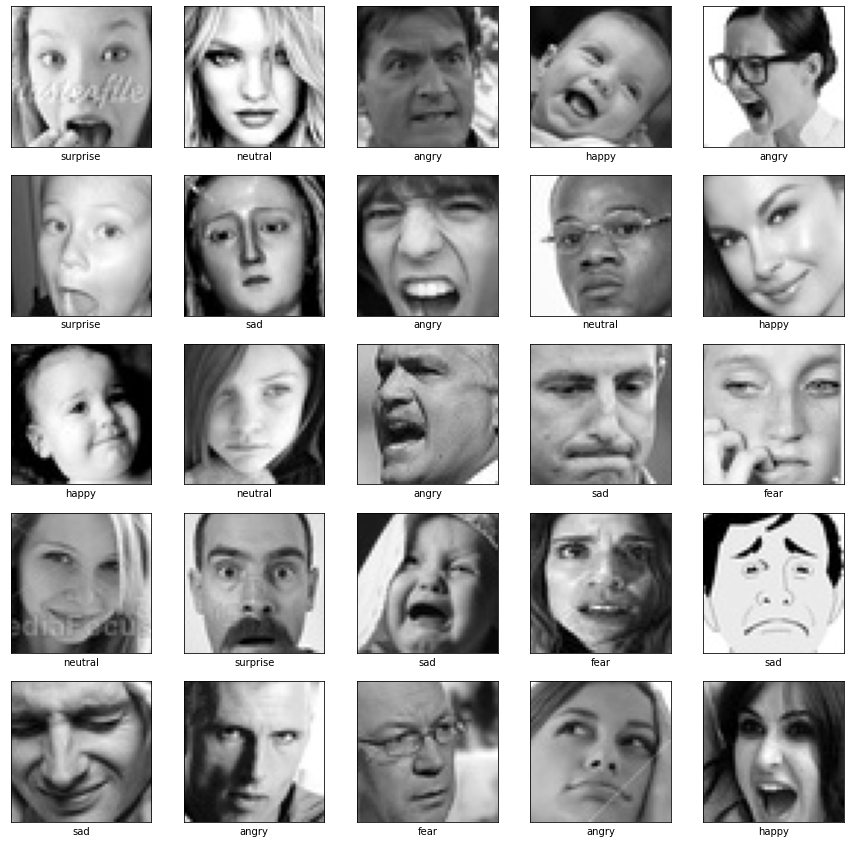

In [10]:
# Checking 25 random images from the train set across all classes
plt.figure(figsize=(15,15))
for ind, img_num in enumerate(np.random.randint(1,len(train_images),size=25)):
    plt.subplot(5,5,ind+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_num], cmap='gray' )#cmap=plt.cm.binary)
    plt.xlabel(label_lookup[train_labels[img_num]])
plt.show()

## Building a model with 3 layers

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(48, 48)), # shape of the input data
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax') # 7 output layers
])

* Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [39]:
model.compile(
    optimizer='adam',
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
 21/898 [..............................] - ETA: 4s - loss: 2.1243 - accuracy: 0.2083

2022-05-04 11:00:23.377243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


898/898 [==============================] - 4s 4ms/step - loss: 1.7924 - accuracy: 0.2766
Epoch 2/100
898/898 [==============================] - 4s 4ms/step - loss: 1.7213 - accuracy: 0.3193
Epoch 3/100
898/898 [==============================] - 4s 4ms/step - loss: 1.6945 - accuracy: 0.3328
Epoch 4/100
898/898 [==============================] - 4s 4ms/step - loss: 1.6769 - accuracy: 0.3431
Epoch 5/100
898/898 [==============================] - 4s 4ms/step - loss: 1.6705 - accuracy: 0.3447
Epoch 6/100
898/898 [==============================] - 4s 4ms/step - loss: 1.6652 - accuracy: 0.3471
Epoch 7/100
898/898 [==============================] - 4s 4ms/step - loss: 1.6571 - accuracy: 0.3518
Epoch 8/100
898/898 [==============================] - 4s 4ms/step - loss: 1.6489 - accuracy: 0.3573
Epoch 9/100
898/898 [==============================] - 4s 4ms/step - loss: 1.6430 - accuracy: 0.3587
Epoch 10/100
898/898 [==============================] - 4s 4ms/step - loss: 1.6398 - accuracy: 0.3586
E

In [41]:
#compare how the model performs on the test dataset:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2022-05-04 11:06:57.944287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 - 1s - loss: 1.6329 - accuracy: 0.3718 - 719ms/epoch - 3ms/step

Test accuracy: 0.37183061242103577


#### Plotting accuracy scores

In [ ]:
# history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

In [ ]:
# fig , ax = plt.subplots(1,2)
# train_acc = history.history['accuracy']
# train_loss = history.history['loss']
# fig.set_size_inches(12,4)

# ax[0].plot(history.history['accuracy'])
# ax[0].plot(history.history['val_accuracy'])
# ax[0].set_title('Training vs Validation Accuracy')
# ax[0].set_ylabel('Accuracy')
# ax[0].set_xlabel('Epoch')
# ax[0].legend(['Train', 'Validation'], loc='lower right')

# ax[1].plot(history.history['loss'])
# ax[1].plot(history.history['val_loss'])
# ax[1].set_title('Training vs Validation Loss')
# ax[1].set_ylabel('Loss')
# ax[1].set_xlabel('Epoch')
# ax[1].legend(['Train', 'Validation'], loc='upper right')

# plt.show()

### Making predictions using the model trained above

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)
predictions[0]

2022-05-04 10:51:46.415489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([0.03731699, 0.00458843, 0.04957782, 0.72530776, 0.06276877,
       0.00525481, 0.11518537], dtype=float32)

In [17]:
label_lookup[np.argmax(predictions[0])]

'happy'

In [110]:
# def plot_image(i, predictions_array, true_label, img):
#     true_label, img = true_label[i], img[i]
#     plt.grid(False)
#     plt.xticks([])
#     plt.yticks([])

#     plt.imshow(img, cmap=plt.cm.binary)

#     predicted_label = np.argmax(predictions_array)
#     if predicted_label == true_label:
#         color = 'blue'
#     else:
#         color = 'red'

#     plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
#                                 100*np.max(predictions_array),
#                                 class_names[true_label]),
#                                 color=color)

# def plot_value_array(i, predictions_array, true_label):
#     true_label = true_label[i]
#     plt.grid(False)
#     plt.xticks(range(10))
#     plt.yticks([])
#     thisplot = plt.bar(range(10), predictions_array, color="#777777")
#     plt.ylim([0, 1])
#     predicted_label = np.argmax(predictions_array)

#     thisplot[predicted_label].set_color('red')
#     thisplot[true_label].set_color('blue')

In [111]:
# i = 0
# plt.figure(figsize=(6,3))
# plt.subplot(1,2,1)
# plot_image(i, predictions[i], test_labels, test_images)
# plt.subplot(1,2,2)
# plot_value_array(i, predictions[i],  test_labels)
# plt.show()

In [112]:
# i = 12
# plt.figure(figsize=(6,3))
# plt.subplot(1,2,1)
# plot_image(i, predictions[i], test_labels, test_images)
# plt.subplot(1,2,2)
# plot_value_array(i, predictions[i],  test_labels)
# plt.show()

In [113]:
# # Plot the first X test images, their predicted labels, and the true labels.
# # Color correct predictions in blue and incorrect predictions in red.
# num_rows = 5
# num_cols = 3
# num_images = num_rows*num_cols
# plt.figure(figsize=(2*2*num_cols, 2*num_rows))
# for i in range(num_images):
#   plt.subplot(num_rows, 2*num_cols, 2*i+1)
#   plot_image(i, predictions[i], test_labels, test_images)
#   plt.subplot(num_rows, 2*num_cols, 2*i+2)
#   plot_value_array(i, predictions[i], test_labels)
# plt.tight_layout()
# plt.show()

## Example code
From the TF tutorial: https://www.tensorflow.org/tutorials/keras/classification

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

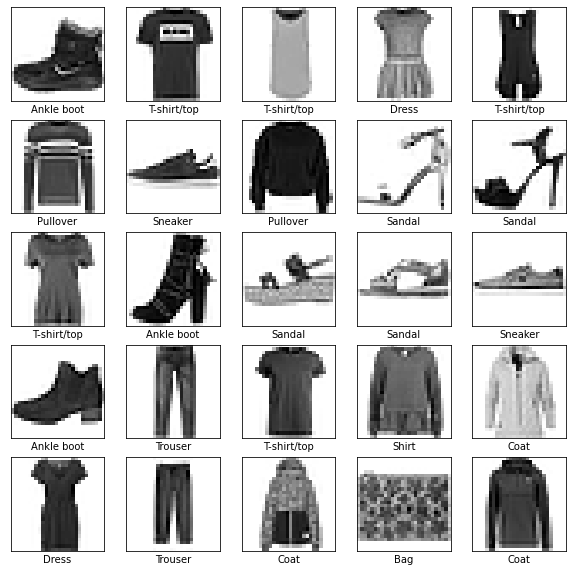

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

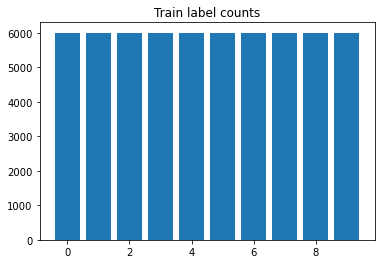

In [53]:
#Count the number of occurences in the train set
label, counts = np.unique(train_labels, return_counts = True)

plt.bar(label, counts )
plt.title('Train label counts')
plt.show()

In [49]:
exmpl_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [50]:
exmpl_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
exmpl_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2022-05-04 11:10:40.912447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.5005 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3792 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3375 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3133 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2959 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2799 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2687 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2574 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2462 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2379 - accurac

In [52]:
#compare how the model performs on the test dataset:
test_loss, test_acc = exmpl_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2022-05-04 11:11:57.804982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3504 - accuracy: 0.8787 - 926ms/epoch - 3ms/step

Test accuracy: 0.8787000179290771
